In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
csv_filename = "/content/story_dataset.csv"
df = pd.read_csv(csv_filename)
dataset = df["Story"].tolist()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset)
total_words = len(tokenizer.word_index) + 1

In [ ]:
input_sequences = []
for sentence in dataset:
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])

In [ ]:
max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

In [ ]:
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [ ]:
model = Sequential([
    Embedding(total_words, 10, input_length=max_sequence_length-1),
    LSTM(150, return_sequences=True),
    LSTM(150),
    Dense(total_words, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.0294 - loss: 5.1684
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.1006 - loss: 5.0874
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.0792 - loss: 4.9014
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.0795 - loss: 4.7732
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.0836 - loss: 4.7758 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.0845 - loss: 4.8415
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.0628 - loss: 4.8030
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.0773 - loss: 4.8310
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.0844 - loss: 4.7408
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.0810 - loss: 4.7513
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.0669 - loss: 4.8547
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.0625 

In [ ]:
def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text


In [ ]:
test_sentences = [
    "Once upon a time, there was a",
    "A brave knight set out on a",
    "Deep in the forest, an old",
    "The mysterious wizard cast a",
    "A young traveler discovered a hidden"
]

for i, test_sentence in enumerate(test_sentences):
    generated_story = generate_text(test_sentence, next_words=10)
    print(f"Generated Story {i+1}: {generated_story}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Generated Story 1: Once upon a time, there was a a hidden village of elves prepared for an age old
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Generated Story 2: A brave knight set out on a to animals unraveled the mystery of a lost civilization the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/

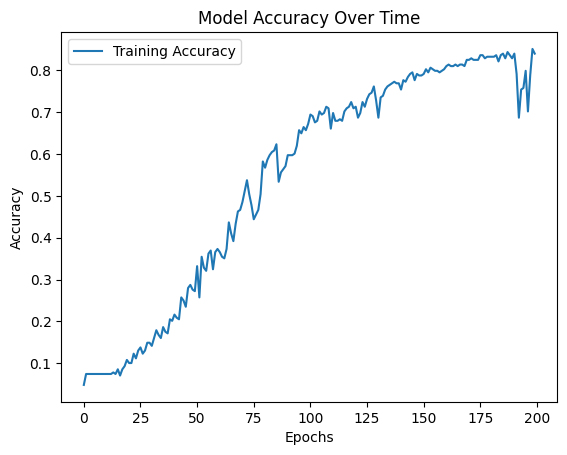

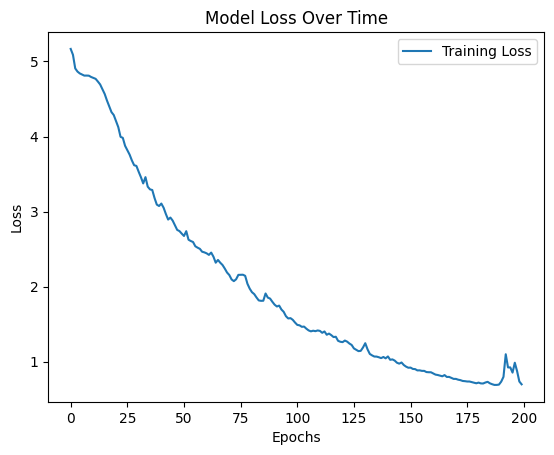

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Time')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Time')
plt.legend()
plt.show()